# The Failure of Accuracy
Classification accuracy is the most-used metric for evaluating classification models. The reason
for its wide use is because it is easy to calculate, easy to interpret, and is a single number to
summarize the model’s capability. As such, it is natural to use it on imbalanced classification
problems, where the distribution of examples in the training dataset across the classes is not
equal. This is the most common mistake made by beginners to imbalanced classification.

When the class distribution is slightly skewed, accuracy can still be a useful metric. When
the skew in the class distributions are severe, accuracy can become an unreliable measure of
model performance. The reason for this unreliability is centered around the average machine
learning practitioner and the intuitions for classification accuracy. Typically, classification
predictive modeling is practiced with small datasets where the class distribution is equal or very
close to equal. Therefore, most practitioners develop an intuition that large accuracy score (or
conversely small error rate scores) are good, and values above 90 percent are great.

Achieving 90 percent classification accuracy, or even 99 percent classification accuracy, may
be trivial on an imbalanced classification problem. This means that intuitions for classification
accuracy developed on balanced class distributions will be applied and will be wrong, misleading
the practitioner into thinking that a model has good or even excellent performance when it, in
fact, does not.

## Accuracy Paradox

Consider the case of an imbalanced dataset with a 1:100 class imbalance. In this problem, each
example of the minority class (class 1) will have a corresponding 100 examples for the majority
class (class 0). In problems of this type, the majority class represents normal and the minority
class represents abnormal, such as a fault, a diagnosis, or a fraud. Good performance on the
minority class will be preferred over good performance on both classes.

In this problem, a model that predicts the majority class (class 0) for all examples in the
test set will have a classification accuracy of 99 percent, mirroring the distribution of major and
minor examples expected in the test set on average. Many machine learning models are designed
around the assumption of balanced class distribution, and often learn simple rules (explicit or
otherwise) like always predict the majority class, causing them to achieve an accuracy of 99
percent, although in practice performing no better than an unskilled majority class classifier.

Counter({0: 9900, 1: 100})


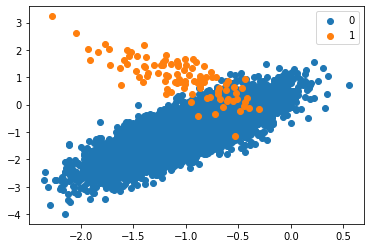

In [1]:
# define an imbalanced dataset with a 1:100 class ratio
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [5]:
from numpy import mean
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y, model):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model on the dataset
    scores = cross_val_score(model, X, y, scoring= 'accuracy' , cv=cv, n_jobs=-1)
    # return scores from each fold and each repeat
    return scores

# define model
model = DummyClassifier(strategy= 'most_frequent' )
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print( ' Mean Accuracy: %.2f%% ' % (mean(scores) * 100))

 Mean Accuracy: 99.00% 


## How to Choose an Evaluation Metric ? 
https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

<img src="https://machinelearningmastery.com/wp-content/uploads/2019/12/How-to-Choose-a-Metric-for-Imbalanced-Classification-latest.png">

## Precision, Recall, and F-measure
You may decide to use precision or recall on your imbalanced classification problem. Maximizing
precision will minimize the number false positive errors, whereas maximizing the recall will
minimize the number of false negative errors. As such, precision may be more appropriate on
classification problems when false positives are more important. Alternately, recall may be more
appropriate on classification problems when false negatives are more important.
- Precision: Appropriate when minimizing false positives is the focus.
- Recall: Appropriate when minimizing false negatives is the focus.

Sometimes, we want excellent predictions of the positive class. We want high precision and
high recall. This can be challenging, as often increases in recall often come at the expense of
decreases in precision

### F-measure
https://machinelearningmastery.com/fbeta-measure-for-machine-learning/#:~:text=Fbeta%2Dmeasure%20is%20a%20configurable,predictions%20for%20the%20positive%20class.

Fbeta = ((1 + beta^2) * Precision * Recall) / (beta^2 * Precision + Recall)

Three common values for the beta parameter are as follows:

- F0.5-Measure (beta=0.5): More weight on precision, less weight on recall.
- F1-Measure (beta=1.0): Balance the weight on precision and recall.
- F2-Measure (beta=2.0): Less weight on precision, more weight on recall

The impact on the calculation for different beta values is not intuitive, at first.



In [6]:
# calculate the f1-measure
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# perfect precision, 50% recall
y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
p = precision_score(y_true, y_pred)
r = recall_score(y_true, y_pred)
f = fbeta_score(y_true, y_pred, beta=1.0)
print('Result: p=%.3f, r=%.3f, f=%.3f' % (p, r, f))

Result: p=0.500, r=1.000, f=0.667


## ROC Curves and Precision-Recall Curves
Most imbalanced classification problems involve two classes: a negative case with the majority
of examples and a positive case with a minority of examples. Two diagnostic tools that help in
the interpretation of binary (two-class) classification predictive models are ROC Curves and
Precision-Recall curves.

An ROC curve (or receiver operating characteristic curve) is a plot that summarizes the
performance of a binary classification model on the positive class. The x-axis indicates the False
Positive Rate and the y-axis indicates the True Positive Rate.

In [1]:
# create an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01],
random_state=1)
# split into train/test sets with same class ratio
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2,
stratify=y)
# summarize dataset
print( ' Dataset: Class0=%d, Class1=%d ' % (len(y[y==0]), len(y[y==1])))
print( ' Train: Class0=%d, Class1=%d ' % (len(trainy[trainy==0]), len(trainy[trainy==1])))
print( ' Test: Class0=%d, Class1=%d ' % (len(testy[testy==0]), len(testy[testy==1])))

 Dataset: Class0=985, Class1=15 
 Train: Class0=492, Class1=8 
 Test: Class0=493, Class1=7 


### ROC Area Under Curve (AUC) Score

Although the ROC Curve is a helpful diagnostic tool, it can be challenging to compare two or
more classifiers based on their curves. Instead, the area under the curve can be calculated to
give a single score for a classifier model across all threshold values. This is called the ROC area
under curve or ROC AUC or sometimes ROCAUC. The score is a value between 0.0 and 1.0,
with 1.0 indicating a perfect classifier.

 No Skill ROC AUC 0.563 
 Logistic ROC AUC 0.869 


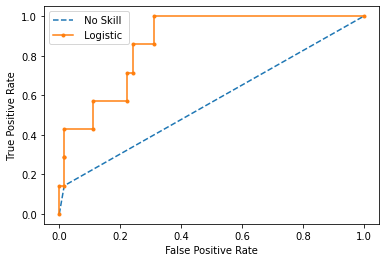

In [8]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from matplotlib import pyplot
# plot no skill and model roc curves
def plot_roc_curve(test_y, naive_probs, model_probs):
    # plot naive skill roc curve
    fpr, tpr, _ = roc_curve(test_y, naive_probs)
    pyplot.plot(fpr, tpr, linestyle= '--' , label= ' No Skill ' )
    # plot model roc curve
    fpr, tpr, _ = roc_curve(test_y, model_probs)
    pyplot.plot(fpr, tpr, marker= '.' , label= ' Logistic ' )
    # axis labels
    pyplot.xlabel( ' False Positive Rate ' )
    pyplot.ylabel( ' True Positive Rate ' )
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

# no skill model, stratified random class predictions
model = DummyClassifier(strategy= 'stratified' )
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
naive_probs = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(testy, naive_probs)
print( ' No Skill ROC AUC %.3f ' % roc_auc)
# skilled model
model = LogisticRegression(solver= 'lbfgs' )
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
model_probs = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(testy, model_probs)
print( ' Logistic ROC AUC %.3f ' % roc_auc)
# plot roc curves
plot_roc_curve(testy, naive_probs, model_probs)

### Precision-Recall Area Under Curve (AUC) Score

PR Curve: Plot of Recall (x) vs Precision (y).

The Precision-Recall AUC is just like the ROC AUC, in that it summarizes the curve with a
range of threshold values as a single score. The score can then be used as a point of comparison
between different models on a binary classification problem where a score of 1.0 represents a
model with perfect skill. The Precision-Recall AUC score can be calculated using the auc()
function in scikit-learn, taking the precision and recall values as arguments.

 No Skill PR AUC: 0.133 
 Logistic PR AUC: 0.228 


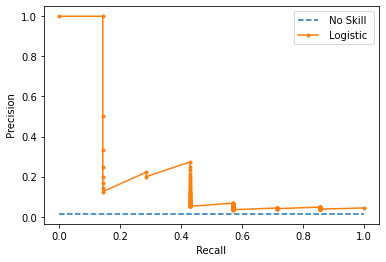

In [10]:
from sklearn.metrics import precision_recall_curve, auc 

# plot no skill and model precision-recall curves
def plot_pr_curve(test_y, model_probs):
    # calculate the no skill line as the proportion of the positive class
    no_skill = len(test_y[test_y==1]) / len(test_y)
    # plot the no skill precision-recall curve
    pyplot.plot([0, 1], [no_skill, no_skill], linestyle= '--' , label= ' No Skill ' )
    # plot model precision-recall curve
    precision, recall, _ = precision_recall_curve(testy, model_probs)
    pyplot.plot(recall, precision, marker= '.' , label= ' Logistic ' )
    # axis labels
    pyplot.xlabel( ' Recall ' )
    pyplot.ylabel( ' Precision ' )
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(testy, naive_probs)
auc_score = auc(recall, precision)
print( ' No Skill PR AUC: %.3f ' % auc_score)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(testy, model_probs)
auc_score = auc(recall, precision)
print( ' Logistic PR AUC: %.3f ' % auc_score)
# plot precision-recall curves
plot_pr_curve(testy, model_probs)

## Probability Scoring Methods
Classification predictive modeling involves predicting a class label for examples, although some
problems require the prediction of a probability of class membership. For these problems, the
crisp class labels are not required, and instead, the likelihood that each example belonging to
each class is required and later interpreted. As such, small relative probabilities can carry a
lot of meaning and specialized metrics are required to quantify the predicted probabilities

### Log Loss Score
Logarithmic loss or log loss for short is a loss function known for training the logistic regression
classification algorithm. The log loss function calculates the negative log likelihood for probability
predictions made by the binary classification model. Most notably, this is logistic regression,
but this function can be used by other models, such as neural networks, and is known by other
names, such as cross-entropy.

In [7]:

# log loss for naive probability predictions.
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99], flip_y=0,
random_state=1)
# split into train/test sets with same class ratio
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2,
stratify=y)
# no skill prediction 0
probabilities = [[1, 0] for _ in range(len(testy))]
avg_logloss = log_loss(testy, probabilities)
print( ' P(class0=1): Log Loss=%.3f ' % (avg_logloss))
# no skill prediction 1
probabilities = [[0, 1] for _ in range(len(testy))]
avg_logloss = log_loss(testy, probabilities)
print( ' P(class1=1): Log Loss=%.3f ' % (avg_logloss))
# baseline probabilities
probabilities = [[0.99, 0.01] for _ in range(len(testy))]
avg_logloss = log_loss(testy, probabilities)
print( ' Baseline: Log Loss=%.3f ' % (avg_logloss))
# perfect probabilities
avg_logloss = log_loss(testy, testy)
print( ' Perfect: Log Loss=%.3f ' % (avg_logloss))

 P(class0=1): Log Loss=0.345 
 P(class1=1): Log Loss=34.193 
 Baseline: Log Loss=0.056 
 Perfect: Log Loss=0.000 


### Brier Score
The Brier score, named for Glenn Brier, calculates the mean squared error between predicted
probabilities and the expected values. The score summarizes the magnitude of the error in
the predicted probabilities and is designed for binary classification problems. It is focused on
evaluating the probabilities for the positive class. Nevertheless, it can be adapted for problems
with multiple classes. It is also an appropriate probabilistic metric for imbalanced classification
problems.

In [9]:
# brier score for naive probability predictions.
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import brier_score_loss
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99], flip_y=0,
random_state=1)
# split into train/test sets with same class ratio
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2,
stratify=y)
# no skill prediction 0
probabilities = [0.0 for _ in range(len(testy))]
avg_brier = brier_score_loss(testy, probabilities)
print( ' P(class1=0): Brier Score=%.4f ' % (avg_brier))
# no skill prediction 1
probabilities = [1.0 for _ in range(len(testy))]
avg_brier = brier_score_loss(testy, probabilities)
print( ' P(class1=1): Brier Score=%.4f ' % (avg_brier))
# baseline probabilities
probabilities = [0.01 for _ in range(len(testy))]
avg_brier = brier_score_loss(testy, probabilities)
print( ' Baseline: Brier Score=%.4f ' % (avg_brier))
# perfect probabilities
avg_brier = brier_score_loss(testy, testy)
print( ' Perfect: Brier Score=%.4f ' % (avg_brier))

 P(class1=0): Brier Score=0.0100 
 P(class1=1): Brier Score=0.9900 
 Baseline: Brier Score=0.0099 
 Perfect: Brier Score=0.0000 


## Cross-Validation for Imbalanced Datasets

### Failure of k-Fold Cross-Validation
Sadly, k-fold cross-validation is not appropriate for evaluating imbalanced classifiers.

The reason is that the data is split into k-folds with a uniform probability distribution. This
might work fine for data with a balanced class distribution, but when the distribution is severely
skewed, it is likely that one or more folds will have few or no examples from the minority class.

This means that some or perhaps many of the model evaluations will be misleading, as the
model need only predict the majority class correctly.

### Fix Cross-Validation for Imbalanced Classification

The solution is to not split the data randomly when using k-fold cross-validation or a train-test
split. Specifically, we can split a dataset randomly, although in such a way that maintains the
same class distribution in each subset. This is called stratification or stratified sampling and
the target variable (y), the class, is used to control the sampling process

For example, we can
use a version of k-fold cross-validation that preserves the imbalanced class distribution in each
fold. It is called stratified k-fold cross-validation and will enforce the class distribution in each
split of the data to match the distribution in the complete training dataset.

In [8]:
# example of stratified k-fold cross-validation with an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], flip_y=0,
random_state=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# enumerate the splits and summarize the distributions
for train_ix, test_ix in kfold.split(X, y):
    # select rows
    train_X, test_X = X[train_ix], X[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    # summarize train and test composition
    train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print( ' >Train: 0=%d, 1=%d, Test: 0=%d, 1=%d ' % (train_0, train_1, test_0, test_1))

 >Train: 0=792, 1=8, Test: 0=198, 1=2 
 >Train: 0=792, 1=8, Test: 0=198, 1=2 
 >Train: 0=792, 1=8, Test: 0=198, 1=2 
 >Train: 0=792, 1=8, Test: 0=198, 1=2 
 >Train: 0=792, 1=8, Test: 0=198, 1=2 
